In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
mnist = fetch_openml('mnist_784',as_frame=False)

x,y = mnist.data , mnist.target
print(x)
print(y)

x.shape
y.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' ... '4' '5' '6']


(70000,)

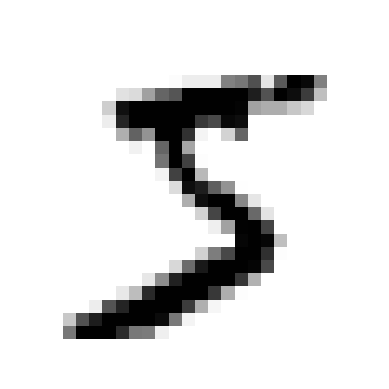

5


In [2]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28) # from 1d array to 2d array ..
    plt.imshow(image, cmap='binary') # using color with 2 only white and black 
    plt.axis("off") # showing grid axis 
some_digit = x[0]
plot_digit(some_digit)
plt.show()
print(y[0])


In [3]:
x_train,x_test= x[:60000],x[60000:]
print(x_train)
print(x_test)
print(x.dtype, x.min(), x.max())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
int64 0 255


In [4]:
y_train, y_test = y[:60000], y[60000:]
ytrain_5 = (y_train == '5')
ytest_5 = (y_test == '5')
print(ytrain_5)

[ True False False ...  True False False]


In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train,ytrain_5)
sgd_clf.predict([some_digit])



array([ True])

In [6]:
# measuring accuracy using cross-validation

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,x_train,ytrain_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [7]:
# using dummy classifier for accuracy

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(x_train,ytrain_5)
print(any(dummy_clf.predict(x_train)))

cross_val_score(dummy_clf,x_train,ytrain_5,cv=3,scoring="accuracy")

False


array([0.90965, 0.90965, 0.90965])

In [8]:
# This demonstrates why accuracy is generally not the preferred performance measure
#for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are more frequent than others..
#A much better way to evaluate the performance of a classifier is to look at the confusion matrix (CM)

In [9]:
# implementation of cross-validation

In [10]:
# confusion matrix

from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_clf, x_train, ytrain_5, cv=3)
print(y_train_predict)



[ True False False ...  True False False]


In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytrain_5,y_train_predict)
print(cm)
print("\nConfusion matrix layout:")
print("[[True Negatives (TN), False Positives (FP)]")
print(" [False Negatives (FN), True Positives (TP)]]")
print(f"\nIn your result:\nTN = {cm[0,0]}\nFP = {cm[0,1]}\nFN = {cm[1,0]}\nTP = {cm[1,1]}")

[[53892   687]
 [ 1891  3530]]

Confusion matrix layout:
[[True Negatives (TN), False Positives (FP)]
 [False Negatives (FN), True Positives (TP)]]

In your result:
TN = 53892
FP = 687
FN = 1891
TP = 3530


In [12]:
# assume we have predicted everything correctly

y_predicted_all = ytrain_5

cm1 = confusion_matrix(y_predicted_all,ytrain_5)
print(cm1)

[[54579     0]
 [    0  5421]]


In [13]:
# An interesting one to look at is the accuracy of the positive 
# predictions; this is called the precision of the classifier

from sklearn.metrics import precision_score,recall_score

ps = precision_score(ytrain_5,y_train_predict)
rs = recall_score(ytrain_5,y_train_predict)

print(ps) # when your model predicts “5”, it’s right 84% of the time.
print(rs) # your model only finds 65% of all 5s; it misses 35%.

0.8370879772350012
0.6511713705958311


In [14]:
#f1-score 

from sklearn.metrics import f1_score

f1 = f1_score(ytrain_5,y_train_predict) # balances between them ...
print(f1)

0.7325171197343847


In [15]:
# # precision / recall trade off

# Your classifier doesn’t just spit out “yes/no” labels.
# Internally, it usually gives a score/probability (e.g., logistic regression gives P(y=1|x)).

# Then you apply a threshold (commonly 0.5).

# If score ≥ threshold → predict Positive, else Negative.

# Now:

# If you lower the threshold →

# You say “positive” more often.

# ✅ Recall goes up (you catch more real positives).

# ❌ Precision goes down (more false alarms).

# If you raise the threshold →

# You say “positive” less often.

# ✅ Precision goes up (fewer false positives).

# ❌ Recall goes down (you miss many positives).



In [16]:
y_score = sgd_clf.decision_function([some_digit])
print(y_score)

threshold = 0
y_some_digit_pred = (threshold < y_score)
print(y_some_digit_pred)


threshold1 = 3000
y_some_digit_pred1 = (threshold1 < y_score)
print(y_some_digit_pred1)

[2164.22030239]
[ True]
[False]


In [17]:
y_scores = cross_val_predict(sgd_clf,x_train,ytrain_5,cv=3,method="decision_function")
print(y_score)

[2164.22030239]


In [18]:
from sklearn.metrics import precision_recall_curve

precisions, recalls,thresholds = precision_recall_curve(ytrain_5,y_scores)
print(precisions)
print(recalls)
print(threshold)

[0.09035    0.09035151 0.09035301 ... 1.         1.         1.        ]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
0


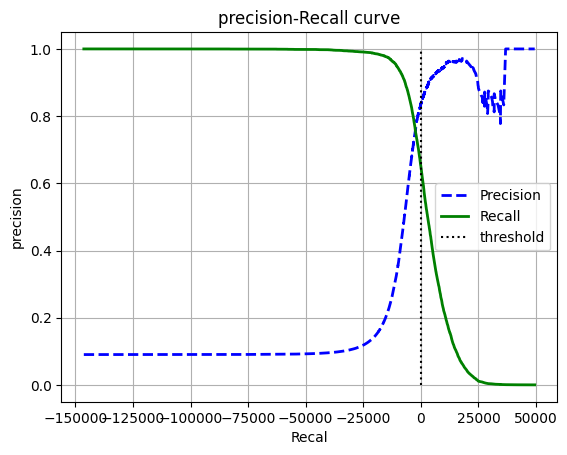

In [24]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.xlabel("Recal")
plt.ylabel("precision")
plt.title("precision-Recall curve")
plt.legend()
plt.grid(True)
plt.show()

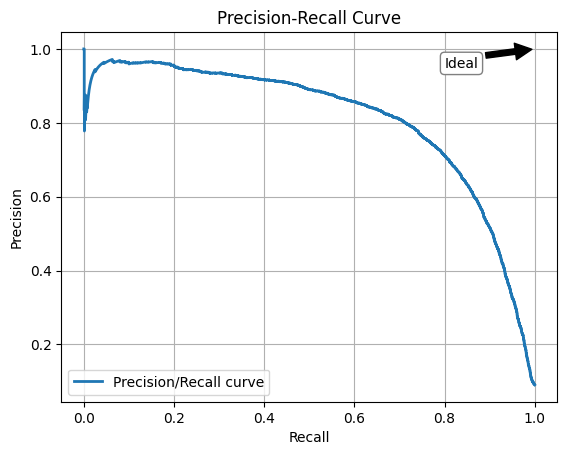

In [21]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.legend()
plt.annotate(
    "Ideal", 
    xy=(1, 1), 
    xytext=(0.8, 0.95),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white")
)
plt.show()

In [ ]:
# use the first such index where you can choose max precision 

idx_for_90_precision = ( precisions >= 0.90).argmax()
th_90_prec = thresholds[idx_for_90_precision]
print(th_90_prec)


3370.0194991439557


In [28]:
# now do predict for it 

y_train_90_pred = (y_scores >= th_90_prec)

p = precision_score(ytrain_5,y_train_90_pred)
print(p)
r = recall_score(ytrain_5,y_train_90_pred)
print(r)

0.9000345901072293
0.4799852425751706


In [29]:
# ROC curve 

from sklearn.metrics import roc_curve

fpr ,tpr,thresholds =roc_curve(ytrain_5,y_scores)


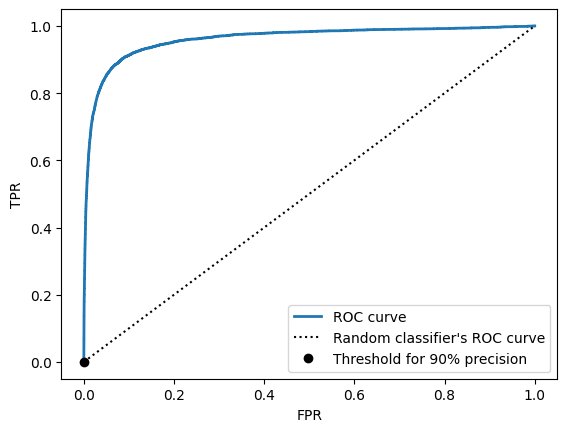

In [32]:
idx_for_th_90 = (threshold <= th_90_prec).argmax()
tpr_90, fpr_90 = tpr[idx_for_th_90], fpr[idx_for_th_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.axis(True)
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(ytrain_5,y_scores)
print(score)

0.9604938554008616


In [35]:
# Let’s now create a RandomForestClassifier, whose PR curve and F1 score we can
# compare to those of the SGDClassifier:


from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
print(forest_clf)


RandomForestClassifier(random_state=42)
